# TMDB Data by Popularity

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

In [26]:
#iterate through 499 API requests. Each "page" contains 20 records. Records are stored in 'collected_data'
#this cell takes approximately 5 minutes to run

collected_data = []

for i in range(1,500,1):
    request_string = "https://api.themoviedb.org/3/discover/movie?api_key=afc7201593c1f2fc08c24eec64fabc88&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&primary_release_date.lte=2019-12-30&primary_release_date.gte=2000-01-01&page="+str(i)
    data = requests.get(request_string)
    data = data.json()['results']
    for item in data:
        collected_data.append(item)

KeyboardInterrupt: 

In [4]:
#load data into dataframe
df = pd.DataFrame(collected_data)

In [6]:
df.head(2)

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,86.008,14336,False,/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg,475557,False,/n6bUvigpRFqSwmPp1m2YADdbRBc.jpg,en,Joker,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02
1,68.072,155,False,/ijJm0RSeKIr67qkHLtSmtigS6ra.jpg,430155,False,/8HbqSozBJxv6UldR9lMUECUlbLI.jpg,ru,Кома,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,2019-11-19


In [7]:
#using the 'discover' API is great for pulling summary data for a list of movies.
#however, it does not pull all the information that TMDB has on any particular movie
#primarily, the 'discover' API is missing budget, revenue, imdb_id, and runtime
#these can be pulled from the 'movie' API call. this cell prepares for the next for loop to pull this required data
budget = []
imdb_id = []
revenue = []
runtime = []
production_companies = []
production_countries = []
genres = []

In [8]:
#create a list of tmdb-movie-ids to iterate through. each id will be used in its own API call
movie_ids = list(df['id'])

In [9]:
#for each movie_id defined above, call API to to retrieve budget, revenue, imdb_id, runtime.
#tmdb data structure isn't uniform. movie dictionaries do not necessarily have all keys.
#to get around this, we used try/except
#this cell takes about 30 minutes to run

for movie_id in movie_ids:
    request_string = "https://api.themoviedb.org/3/movie/"+str(movie_id)+"?api_key=afc7201593c1f2fc08c24eec64fabc88&language=en-US"
    data = requests.get(request_string)
    data = data.json()
    try:
        budget.append(data['budget'])
    except:
        budget.append(" ")
    try:
        imdb_id.append(data['imdb_id'])
    except:
        imdb_id.append(" ")
    try:
        revenue.append(data['revenue'])
    except:
        revenue.append(" ")
    try:
        runtime.append(data['runtime'])
    except:
        runtime.append(" ")
    try:
        production_companies.append(data['production_companies'])
    except:
        production_companies.append(" ")
    try:
        production_countries.append(data['production_countries'])
    except:
        production_countries.append(" ")
    try:
        genres.append(data['genres'])
    except:
        genres.append(" ")

In [28]:

df['budget']=budget
df['imdb_id']=imdb_id
df['runtime']= runtime 
df['production_companies']=production_companies
df['prodcution_countries']=production_companies
df['genres']=genres
df['revenue']=revenue

In [18]:
df.drop(['poster_path','video','backdrop_path','original_title'],axis=1,inplace=True)

TypeError: eval() arg 1 must be a string, bytes or code object

In [76]:
df[(df.revenue<10000)&(df.budget>1000)&(df.popularity<10)]


,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,release_date,budget,imdb_id,runtime,production_companies,prodcution_countries,genres,revenue
1107,9.935,221,399031,fr,[18],Happy End,6.2,A middle-class family living in Calais deal wi...,2017-06-21,13600000,tt5304464,110.0,"[{'id': 94, 'logo_path': '/huC7HqorvUThGIrENrb...","[{'id': 94, 'logo_path': '/huC7HqorvUThGIrENrb...","[{'id': 18, 'name': 'Drama'}]",0
1176,9.755,198,50848,fr,"[35, 18, 10749]",The Names of Love,7.4,"Bahia Benmahmoud, a free-spirited young woman,...",2010-11-24,4600000,tt1646974,100.0,"[{'id': 7694, 'logo_path': None, 'name': 'Dela...","[{'id': 7694, 'logo_path': None, 'name': 'Dela...","[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0
1473,9.101,48,440777,en,[28],Female Fight Squad,6.4,A former fighter reluctantly returns to the li...,2017-03-16,2000000,tt5153860,90.0,"[{'id': 56697, 'logo_path': None, 'name': 'Tad...","[{'id': 56697, 'logo_path': None, 'name': 'Tad...","[{'id': 28, 'name': 'Action'}]",0
1745,9.118,327,410554,en,"[28, 80, 53]",First Kill,5.4,A police chief tries to solve a kidnapping tha...,2017-07-21,10000000,tt5884234,97.0,"[{'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwL...","[{'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwL...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0
1852,9.614,1203,2011,fr,"[16, 18]",Persepolis,7.9,"In 1970s Iran, Marjane 'Marji' Statrapi watche...",2007-06-27,7300000,tt0808417,95.0,"[{'id': 84593, 'logo_path': None, 'name': 'Soc...","[{'id': 84593, 'logo_path': None, 'name': 'Soc...","[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,7.260,33,160220,en,[99],Bronies: The Extremely Unexpected Adult Fans o...,5.2,A film profiling the unusual cross-demographic...,2012-11-04,348164,tt2446192,88.0,"[{'id': 28775, 'logo_path': None, 'name': 'Big...","[{'id': 28775, 'logo_path': None, 'name': 'Big...","[{'id': 99, 'name': 'Documentary'}]",0
9955,5.479,22,291867,en,"[35, 18]",Zeroville,4.7,A young actor arrives in Hollywood in 1969 dur...,2019-09-19,6000000,tt1881109,96.0,"[{'id': 8924, 'logo_path': '/5NTQun1m6FVJVOVHO...","[{'id': 8924, 'logo_path': '/5NTQun1m6FVJVOVHO...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0
9958,5.535,8,514755,en,"[28, 878, 53]",Crossbreed,4.3,"In the near future, the President of the Unite...",2019-02-05,3500000,tt5258074,86.0,"[{'id': 102651, 'logo_path': None, 'name': 'Ja...","[{'id': 102651, 'logo_path': None, 'name': 'Ja...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",0
9965,8.758,58,84228,en,[27],Julia X,4.9,"Meeting a man on the Internet, Julia decides t...",2011-09-24,4000000,tt1533058,92.0,"[{'id': 26610, 'logo_path': None, 'name': 'Dix...","[{'id': 26610, 'logo_path': None, 'name': 'Dix...","[{'id': 27, 'name': 'Horror'}]",0


In [91]:
df.to_csv('tmdb_master.csv',index=False)

In [57]:
df=pd.read_csv('tmdb_master.csv')

In [68]:
df.genre_ids= [eval(key) for key in df.genre_ids]
df.production_companies= [eval(key) for key in df.production_companies]
df.prodcution_countries=[eval(key) for key in df.prodcution_countries]
df.genres= [eval(key) for key in df.genres]

In [89]:
df['release_year'] = df['release_date'].apply(lambda x: int(x[0:4]))
df['release_month'] = df['release_date'].apply(lambda x: int(x[5:7]))
df.drop('release_date',axis= 1,inplace=True)

In [90]:
df

,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,imdb_id,runtime,production_companies,prodcution_countries,genres,revenue,release_year,release_month
0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,tt7286456,122.0,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10
1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,tt6087226,111.0,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11
2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,300000000,tt4154756,149.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,2018,4
3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",250000000,tt3498820,147.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,2016,4
4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",160000000,tt1375666,148.0,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,2010,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,8.765,128,32250,ja,[27],Ju-on: The Curse,6.8,"Jealous of his wifes' love for another man, a ...",4000000,tt0330500,70.0,"[{'id': 9221, 'logo_path': '/7hEAueutGnsQUyUGn...","[{'id': 9221, 'logo_path': '/7hEAueutGnsQUyUGn...","[{'id': 27, 'name': 'Horror'}]",0,2000,2
9974,6.516,190,13637,ja,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,6.3,Several hundred years after the Battle of Dann...,3800000,tt0906665,121.0,"[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,2007,9
9975,6.813,108,581531,ko,"[27, 53]",Metamorphosis,7.5,An evil spirit that changes faces infiltrates ...,0,tt10800758,113.0,"[{'id': 113584, 'logo_path': '/8BSD4OLpa5DnXdX...","[{'id': 113584, 'logo_path': '/8BSD4OLpa5DnXdX...","[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",0,2019,8
9976,5.232,90,482712,fr,[18],The Apparition,6.2,"Jacques Mayano, a French journalist who has li...",9661157,tt6559390,139.0,"[{'id': 77552, 'logo_path': None, 'name': 'Cur...","[{'id': 77552, 'logo_path': None, 'name': 'Cur...","[{'id': 18, 'name': 'Drama'}]",3562793,2018,2


In [71]:
#df.drop('adult',axis=1,inplace=True)

In [78]:
def namefind(name,column):
    """
   namefind(name_to_find, column_name)
    
    Namefind takes a name that you are trying to locate in the column specified dictionary and returns 
    the index of the dataframe that contains said name.
    
    
    namefind('Comedy','genre')
    
    index                                                                   1
    id                                                                   8844
    title                                                             Jumanji
    genres                                    [{'id': 12, 'name': 'Adventure'},
                                                 {'id': 14, 'name': 'Fantasy'},
                                               {'id': 10751, 'name': 'Family'}] 
    """
    loc_list=[]
    for i in range(len(movies_md[column])):
        for d in range(len(movies_md[column][i])):
            if movies_md[column][i][d]['name']==name:
                loc_list.append(i)
    return(movies_md.loc[loc_list])

## Asking questions

### which are the most most popular production companies in the lasst 20 years?

In [85]:

df.sort_values('popularity',ascending=False).head(5)

,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,release_date,budget,imdb_id,runtime,production_companies,prodcution_countries,genres,revenue
0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02,55000000,tt7286456,122.0,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311
2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,2018-04-25,300000000,tt4154756,149.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637
3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",2016-04-27,250000000,tt3498820,147.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293
1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,2019-11-19,4000000,tt6087226,111.0,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584
4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",2010-07-15,160000000,tt1375666,148.0,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764


In [94]:
df.production_companies[0]

[{'id': 9993,
  'logo_path': '/2Tc1P3Ac8M479naPp1kYT3izLS5.png',
  'name': 'DC Entertainment',
  'origin_country': 'US'},
 {'id': 174,
  'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png',
  'name': 'Warner Bros. Pictures',
  'origin_country': 'US'},
 {'id': 429,
  'logo_path': '/2Tc1P3Ac8M479naPp1kYT3izLS5.png',
  'name': 'DC Comics',
  'origin_country': 'US'},
 {'id': 83036,
  'logo_path': None,
  'name': 'Joint Effort',
  'origin_country': 'US'},
 {'id': 79,
  'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
  'name': 'Village Roadshow Pictures',
  'origin_country': 'US'},
 {'id': 13240,
  'logo_path': '/aTc07YaNHo8WNgkQSnvLmG6w4nW.png',
  'name': 'Bron Studios',
  'origin_country': 'CA'},
 {'id': 53152,
  'logo_path': '/8XHHLy8GGTuHM9JMzYjGqxB6oPa.png',
  'name': 'Creative Wealth Media Finance',
  'origin_country': 'CA'},
 {'id': 128064, 'logo_path': None, 'name': 'DC Films', 'origin_country': 'US'},
 {'id': 57409,
  'logo_path': None,
  'name': '22 & Indiana Pictures',
  'origin_count

In [97]:
df.production_companies[0][0]['name']

'DC Entertainment'

In [98]:
test=df.production_companies[0]

In [99]:
test

[{'id': 9993,
  'logo_path': '/2Tc1P3Ac8M479naPp1kYT3izLS5.png',
  'name': 'DC Entertainment',
  'origin_country': 'US'},
 {'id': 174,
  'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png',
  'name': 'Warner Bros. Pictures',
  'origin_country': 'US'},
 {'id': 429,
  'logo_path': '/2Tc1P3Ac8M479naPp1kYT3izLS5.png',
  'name': 'DC Comics',
  'origin_country': 'US'},
 {'id': 83036,
  'logo_path': None,
  'name': 'Joint Effort',
  'origin_country': 'US'},
 {'id': 79,
  'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
  'name': 'Village Roadshow Pictures',
  'origin_country': 'US'},
 {'id': 13240,
  'logo_path': '/aTc07YaNHo8WNgkQSnvLmG6w4nW.png',
  'name': 'Bron Studios',
  'origin_country': 'CA'},
 {'id': 53152,
  'logo_path': '/8XHHLy8GGTuHM9JMzYjGqxB6oPa.png',
  'name': 'Creative Wealth Media Finance',
  'origin_country': 'CA'},
 {'id': 128064, 'logo_path': None, 'name': 'DC Films', 'origin_country': 'US'},
 {'id': 57409,
  'logo_path': None,
  'name': '22 & Indiana Pictures',
  'origin_count

In [103]:
def namelist(cell):
    name_list=[]
    for i in cell:
        name_list.append(i['name'])
    return name_list

In [105]:
df['production_list']=df.production_companies.apply(namelist)

In [107]:
company_list=list(df.production_list)

In [109]:
company_list

[['DC Entertainment',
  'Warner Bros. Pictures',
  'DC Comics',
  'Joint Effort',
  'Village Roadshow Pictures',
  'Bron Studios',
  'Creative Wealth Media Finance',
  'DC Films',
  '22 & Indiana Pictures'],
 ['Fresh Film',
  'Cinema Fund',
  'Mars Media Entertainment',
  'Big Cinema House',
  'Fond kino',
  'Argunov Studio',
  'Central Partnership'],
 ['Marvel Studios'],
 ['Marvel Studios'],
 ['Legendary Entertainment', 'Syncopy', 'Warner Bros. Pictures'],
 ['Warner Bros. Pictures', 'Heyday Films', '1492 Pictures'],
 ['CJ Entertainment', 'Barunson E&A'],
 ['Marvel Studios',
  'Columbia Pictures',
  'Pascal Pictures',
  'Sony Pictures',
  'Stereo D'],
 ['New Regency Productions',
  'Keep Your Head',
  'MadRiver Pictures',
  'Plan B Entertainment',
  'RT Features',
  'Bona Film Group',
  'TSG Entertainment'],
 ['Neal Street Productions',
  'DreamWorks Pictures',
  'New Republic Pictures',
  'Amblin Partners',
  'Universal Pictures',
  'Moving Picture Company',
  'Reliance Entertainment'

In [110]:
dup_list=[]
for a in company_list:
    for i in a:
        dup_list.append(i)

In [111]:
dup_list

['DC Entertainment',
 'Warner Bros. Pictures',
 'DC Comics',
 'Joint Effort',
 'Village Roadshow Pictures',
 'Bron Studios',
 'Creative Wealth Media Finance',
 'DC Films',
 '22 & Indiana Pictures',
 'Fresh Film',
 'Cinema Fund',
 'Mars Media Entertainment',
 'Big Cinema House',
 'Fond kino',
 'Argunov Studio',
 'Central Partnership',
 'Marvel Studios',
 'Marvel Studios',
 'Legendary Entertainment',
 'Syncopy',
 'Warner Bros. Pictures',
 'Warner Bros. Pictures',
 'Heyday Films',
 '1492 Pictures',
 'CJ Entertainment',
 'Barunson E&A',
 'Marvel Studios',
 'Columbia Pictures',
 'Pascal Pictures',
 'Sony Pictures',
 'Stereo D',
 'New Regency Productions',
 'Keep Your Head',
 'MadRiver Pictures',
 'Plan B Entertainment',
 'RT Features',
 'Bona Film Group',
 'TSG Entertainment',
 'Neal Street Productions',
 'DreamWorks Pictures',
 'New Republic Pictures',
 'Amblin Partners',
 'Universal Pictures',
 'Moving Picture Company',
 'Reliance Entertainment',
 'Mogambo',
 'The Canadian Film or Video P

In [114]:
unique_list=list(set(dup_list))

In [115]:
unique_list

['K/O Paper Products',
 'Hive Entertainment',
 'Copenhagen Film Fund',
 'Tag Entertainment',
 'PASTEL',
 'Lambrick Foundation, The',
 'CoBo Fonds',
 'Tayda Film',
 'Apatow Productions',
 '4 1/2',
 'Volume One Entertainment',
 'Mark Johnson Productions',
 'Salty Pictures',
 'Before the Door Pictures',
 'Bourne Again',
 'Dedicate Ltd.',
 'Alter Films',
 'Gkids',
 'Eleven Arts',
 'ORF',
 '24 25 Films',
 'Flamme Films',
 'British Columbia Film',
 'NBC Film',
 'Spirit Dance Entertainment',
 'Telekompanija Forma Pro',
 'SRAB Films',
 'Little Monster Films',
 'Hedge Fund Film Partners',
 '21 Unofilm',
 'Avşar Film',
 'Amberdale Productions',
 'Original Film',
 'Moody Independent',
 'Dillywood',
 'Cape Of Good Films',
 'Realies Pictures',
 'Over Under Media',
 'Saggitaire',
 'Film London',
 'Bedlam Productions',
 'Catch 23 Entertainment',
 'Most/Rice Films',
 'Film Kolektiv',
 'Bluegrass Films',
 'City Drive Entertainment Group',
 'Cinefarm',
 'Zeyno Film',
 'Wild Spark',
 'Kirlian Pictures',


In [118]:
company_dictionary={}
for company in unique_list:
    company_dictionary[company]=0
    
for company in dup_list:
    company_dictionary[company]=company_dictionary[company]+1

In [119]:
company_dictionary

{'K/O Paper Products': 5,
 'Hive Entertainment': 1,
 'Copenhagen Film Fund': 6,
 'Tag Entertainment': 1,
 'PASTEL': 4,
 'Lambrick Foundation, The': 1,
 'CoBo Fonds': 2,
 'Tayda Film': 1,
 'Apatow Productions': 25,
 '4 1/2': 4,
 'Volume One Entertainment': 1,
 'Mark Johnson Productions': 1,
 'Salty Pictures': 5,
 'Before the Door Pictures': 4,
 'Bourne Again': 1,
 'Dedicate Ltd.': 1,
 'Alter Films': 1,
 'Gkids': 3,
 'Eleven Arts': 2,
 'ORF': 5,
 '24 25 Films': 2,
 'Flamme Films': 1,
 'British Columbia Film': 1,
 'NBC Film': 3,
 'Spirit Dance Entertainment': 2,
 'Telekompanija Forma Pro': 1,
 'SRAB Films': 2,
 'Little Monster Films': 1,
 'Hedge Fund Film Partners': 2,
 '21 Unofilm': 1,
 'Avşar Film': 1,
 'Amberdale Productions': 1,
 'Original Film': 38,
 'Moody Independent': 1,
 'Dillywood': 2,
 'Cape Of Good Films': 1,
 'Realies Pictures': 4,
 'Over Under Media': 1,
 'Saggitaire': 1,
 'Film London': 2,
 'Bedlam Productions': 3,
 'Catch 23 Entertainment': 1,
 'Most/Rice Films': 1,
 'Film

In [123]:
companies_df=pd.DataFrame(company_dictionary.items(),  columns=['Name', 'Count'])

In [129]:
top=companies_df.sort_values('Count', ascending=False).head(20)

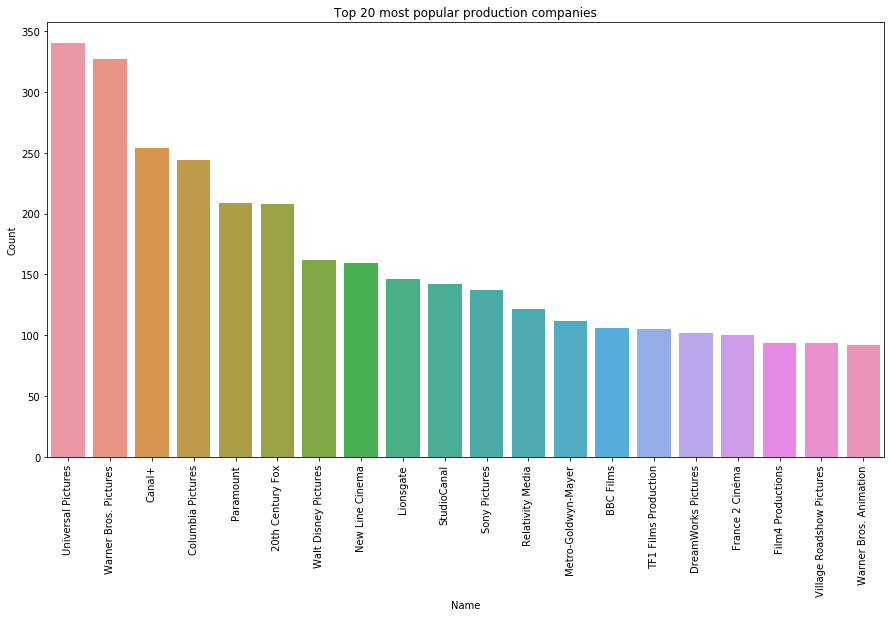

In [141]:
x=top['Name']
y=top['Count']

fig,ax=plt.subplots(figsize=(15,8))
comp_bar=sns.barplot(x,y)
comp_bar.set(title='Top 20 most popular production companies')
comp_bar.set_xticklabels(comp_bar.get_xticklabels(), rotation=90);


### What is the assumed mean revenue per company?

In [143]:
df.head(2)

,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,imdb_id,runtime,production_companies,prodcution_countries,genres,revenue,release_year,release_month,production_list
0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,tt7286456,122.0,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10,"[DC Entertainment, Warner Bros. Pictures, DC C..."
1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,tt6087226,111.0,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11,"[Fresh Film, Cinema Fund, Mars Media Entertain..."


In [211]:
unique_list=sorted(unique_list)
unique_list[::-1]

['사이드미러',
 'Реал-Дакота',
 'Интерфест',
 'Česká televize',
 'Österreichisches Filminstitut',
 'Árpád Productions',
 'wega film vienna',
 'venezia 64',
 'uFund',
 'uFilm',
 'thinkfilm',
 'platinum studios',
 'nWave Pictures',
 'innogy Česká republika',
 'icon',
 'iDeal Partners Film Fund',
 'herbX Film',
 'filmscience',
 'filmK',
 'erbp',
 'double A Films',
 'bob industries',
 'area japan',
 'about Film',
 'Zwart Arbeid',
 'Zucker/Netter Productions',
 'Zucker Productions',
 'Zoom Hunt International Productions Company Ltd.',
 'Zookeeper Productions',
 'Zoma Films Ltd.',
 'Zoetrope Argentina',
 'ZircoZine',
 'Zip Films',
 'Zininsa Film Production',
 'Zide-Perry Productions',
 'Zhongmeng Century Media',
 'Zhejiang Hengdian Film Production',
 'Zeta Zinema',
 'Zeta Film (MX)',
 'Zero Trans Fat Productions',
 'Zero Gravity Management',
 'Zephyr Films',
 'Zentropa International Sweden',
 'Zentropa International Poland',
 'Zentropa International Norway',
 'Zentropa International Köln',
 'Zent

In [146]:
unique_list[0]

'K/O Paper Products'

In [153]:
company_revenue_mean=[]
for company in unique_list:
    mean=0
    count=0
    total=0
    for i in range(len(df.production_list)):
        for a in range(len(df.production_list[i])):
            if company== df.production_list[i][a]:
                total+= df.revenue[i]/len(df.production_list[i])
                count+=1
    company_revenue_mean.append(total/count)

KeyboardInterrupt: 

In [152]:
company_revenue_mean

43237694.49555556

In [356]:
to_drop=df[(df.revenue==0)|(df.budget==0)].index

In [357]:
new_df=df.drop(to_drop)

In [358]:
new_df.reset_index(inplace=True)

In [359]:
new_df

,index,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,imdb_id,runtime,production_companies,prodcution_countries,genres,revenue,release_year,release_month,production_list
0,0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,tt7286456,122.0,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10,"[DC Entertainment, Warner Bros. Pictures, DC C..."
1,1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,tt6087226,111.0,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11,"[Fresh Film, Cinema Fund, Mars Media Entertain..."
2,2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,300000000,tt4154756,149.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,2018,4,[Marvel Studios]
3,3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",250000000,tt3498820,147.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,2016,4,[Marvel Studios]
4,4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",160000000,tt1375666,148.0,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,2010,7,"[Legendary Entertainment, Syncopy, Warner Bros..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,9950,5.546,26,25461,en,"[18, 10749]",Raising Victor Vargas,7.6,"The film follows Victor, a Lower East Side tee...",800000,tt0316188,88.0,"[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2816116,2002,5,"[BlueLight, Forensic Films, StudioCanal, Canal+]"
3647,9962,7.778,145,434273,fr,"[35, 18, 10749]",Mr. Stein Goes Online,6.0,"Pierre, widowed and retired, has not been out ...",5000000,tt4693612,99.0,"[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",3358085,2017,4,"[Detailfilm, Ici & Là Productions, Panache Pro..."
3648,9968,9.463,231,96714,it,[18],Diaz - Don't Clean Up This Blood,7.1,A reenactment of the final days of the 2001 G8...,6453637,tt1934234,127.0,"[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 18, 'name': 'Drama'}]",1800000,2012,4,"[Fandango, Le Pacte, A Plus Image 3, Studioul ..."
3649,9974,6.516,190,13637,ja,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,6.3,Several hundred years after the Battle of Dann...,3800000,tt0906665,121.0,"[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,2007,9,"[Sony Music Entertainment (JP), DENTSU]"


In [360]:
company_list=list(new_df.production_list)
dup_list=[]
for a in company_list:
    for i in a:
        dup_list.append(i)
unique_list=list(set(dup_list))

In [361]:
#company_revenue_mean=[]
#for company in unique_list:
#    mean=0
#   count=0
#    total=0
#   for i in range(len(new_df.production_list)):
#for a in range(len(new_df.production_list[i])):
#           if company== new_df.production_list[i][a]:
#               total+= new_df.revenue[i]/len(new_df.production_list[i])
#               count+=1
#    company_revenue_mean.append(total/count)

In [362]:
new_df.drop(['mean_revenue'],axis=1 ,inplace=True)

KeyError: "['mean_revenue'] not found in axis"

In [176]:
new_df['list_length']=new_df.production_list.apply(lambda x: len(x))

In [178]:
new_df['mean_revenue']= new_df.revenue/new_df.list_length

In [179]:
new_df

,index,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,...,runtime,production_companies,prodcution_countries,genres,revenue,release_year,release_month,production_list,list_length,mean_revenue
0,0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,...,122.0,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10,"[DC Entertainment, Warner Bros. Pictures, DC C...",9,1.193613e+08
1,1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,...,111.0,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11,"[Fresh Film, Cinema Fund, Mars Media Entertain...",7,3.376549e+05
2,2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,300000000,...,149.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,2018,4,[Marvel Studios],1,2.046240e+09
3,3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",250000000,...,147.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,2016,4,[Marvel Studios],1,1.153296e+09
4,4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",160000000,...,148.0,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,2010,7,"[Legendary Entertainment, Syncopy, Warner Bros...",3,2.751776e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,9950,5.546,26,25461,en,"[18, 10749]",Raising Victor Vargas,7.6,"The film follows Victor, a Lower East Side tee...",800000,...,88.0,"[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2816116,2002,5,"[BlueLight, Forensic Films, StudioCanal, Canal+]",4,7.040290e+05
3647,9962,7.778,145,434273,fr,"[35, 18, 10749]",Mr. Stein Goes Online,6.0,"Pierre, widowed and retired, has not been out ...",5000000,...,99.0,"[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",3358085,2017,4,"[Detailfilm, Ici & Là Productions, Panache Pro...",4,8.395212e+05
3648,9968,9.463,231,96714,it,[18],Diaz - Don't Clean Up This Blood,7.1,A reenactment of the final days of the 2001 G8...,6453637,...,127.0,"[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 18, 'name': 'Drama'}]",1800000,2012,4,"[Fandango, Le Pacte, A Plus Image 3, Studioul ...",4,4.500000e+05
3649,9974,6.516,190,13637,ja,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,6.3,Several hundred years after the Battle of Dann...,3800000,...,121.0,"[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,2007,9,"[Sony Music Entertainment (JP), DENTSU]",2,1.362629e+06


In [180]:
company_revenue_mean=[]
for company in unique_list:
    count=0
    total=0
    for i in range(len(new_df.production_list)):
        if company in new_df.production_list[i]:
            total+= new_df.mean_revenue[i]
            count+=1
    company_revenue_mean.append(total/count)

In [187]:
company_revenue_mean=[x/1000 for x in company_revenue_mean]

In [195]:
mean_company=pd.DataFrame(company_revenue_mean,unique_list)

In [198]:
mean_company.reset_index(inplace=True)

In [200]:
mean_company.columns=['company','mean']

In [202]:
mean_company.sort_values('mean',ascending=False,inplace=True)

In [204]:
mean_company.reset_index(inplace=True)

In [213]:
mean_company

,index,company,mean
0,364,Marvel Studios,733176.693000
1,629,Truenorth Productions,689407.874667
2,1122,Pixar,503644.667972
3,2747,Lucasfilm Ltd.,463574.000892
4,2599,Second Mate Productions,337776.635333
...,...,...,...
4654,1368,Momentum Films,0.001556
4655,3068,Fifty First Films,0.001556
4656,2626,VIP 1 Medienfonds,0.001333
4657,2078,Target Media Entertainment,0.001333


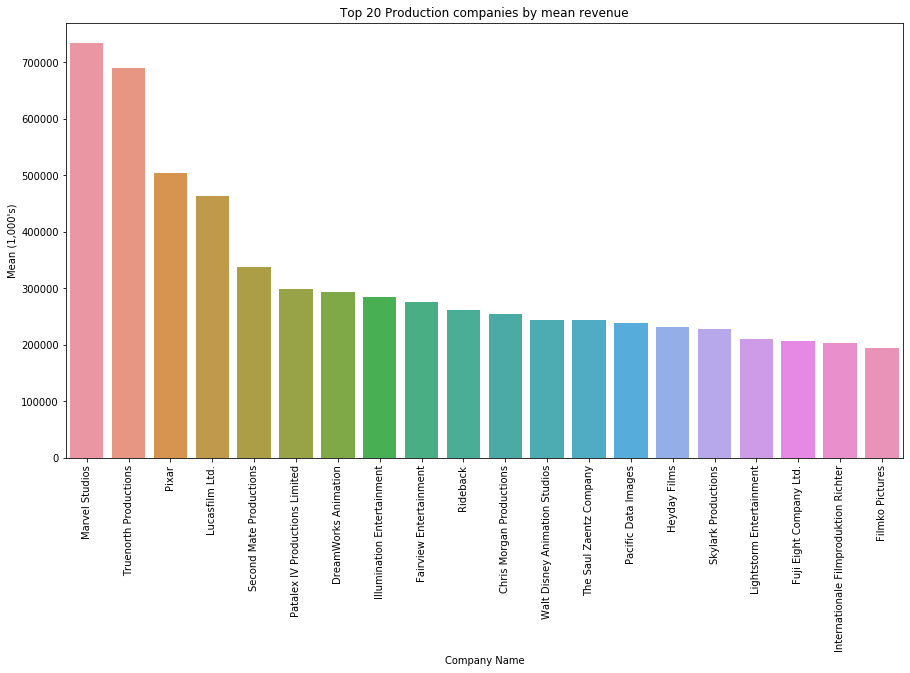

In [217]:
x=mean_company['company'].head(20)
y=mean_company['mean'].head(20)

fig,ax=plt.subplots(figsize=(15,8))
comp_bar=sns.barplot(x,y)
comp_bar.set(title='Top 20 Production companies by mean revenue', ylabel='Mean (1,000\'s)',xlabel='Company Name')
comp_bar.set_xticklabels(comp_bar.get_xticklabels(), rotation=90);


### Revenue per genre

In [221]:
new_df['Profit']= new_df.revenue-new_df.budget

In [222]:
new_df

,index,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,...,production_companies,prodcution_countries,genres,revenue,release_year,release_month,production_list,list_length,mean_revenue,Profit
0,0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,...,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10,"[DC Entertainment, Warner Bros. Pictures, DC C...",9,1.193613e+08,1019251311
1,1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,...,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11,"[Fresh Film, Cinema Fund, Mars Media Entertain...",7,3.376549e+05,-1636416
2,2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,300000000,...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,2018,4,[Marvel Studios],1,2.046240e+09,1746239637
3,3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",250000000,...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,2016,4,[Marvel Studios],1,1.153296e+09,903296293
4,4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",160000000,...,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,2010,7,"[Legendary Entertainment, Syncopy, Warner Bros...",3,2.751776e+08,665532764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,9950,5.546,26,25461,en,"[18, 10749]",Raising Victor Vargas,7.6,"The film follows Victor, a Lower East Side tee...",800000,...,"[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2816116,2002,5,"[BlueLight, Forensic Films, StudioCanal, Canal+]",4,7.040290e+05,2016116
3647,9962,7.778,145,434273,fr,"[35, 18, 10749]",Mr. Stein Goes Online,6.0,"Pierre, widowed and retired, has not been out ...",5000000,...,"[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",3358085,2017,4,"[Detailfilm, Ici & Là Productions, Panache Pro...",4,8.395212e+05,-1641915
3648,9968,9.463,231,96714,it,[18],Diaz - Don't Clean Up This Blood,7.1,A reenactment of the final days of the 2001 G8...,6453637,...,"[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 18, 'name': 'Drama'}]",1800000,2012,4,"[Fandango, Le Pacte, A Plus Image 3, Studioul ...",4,4.500000e+05,-4653637
3649,9974,6.516,190,13637,ja,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,6.3,Several hundred years after the Battle of Dann...,3800000,...,"[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,2007,9,"[Sony Music Entertainment (JP), DENTSU]",2,1.362629e+06,-1074742


In [231]:
new_df['genre_list']=new_df.genres.apply(namelist)
genre_list=list(new_df.genre_list)
dup_list2=[]
for a in new_df.genre_list:
    for i in a:
        dup_list2.append(i)
unique_list2=list(set(dup_list2))

In [252]:
len(unique_list2)

19

In [236]:
genredf=new_df
genredf

,index,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,...,prodcution_countries,genres,revenue,release_year,release_month,production_list,list_length,mean_revenue,Profit,genre_list
0,0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,...,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10,"[DC Entertainment, Warner Bros. Pictures, DC C...",9,1.193613e+08,1019251311,"[Crime, Thriller, Drama]"
1,1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,...,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11,"[Fresh Film, Cinema Fund, Mars Media Entertain...",7,3.376549e+05,-1636416,"[Fantasy, Action, Science Fiction]"
2,2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,300000000,...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,2018,4,[Marvel Studios],1,2.046240e+09,1746239637,"[Adventure, Action, Science Fiction]"
3,3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",250000000,...,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,2016,4,[Marvel Studios],1,1.153296e+09,903296293,"[Adventure, Action, Science Fiction]"
4,4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",160000000,...,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,2010,7,"[Legendary Entertainment, Syncopy, Warner Bros...",3,2.751776e+08,665532764,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,9950,5.546,26,25461,en,"[18, 10749]",Raising Victor Vargas,7.6,"The film follows Victor, a Lower East Side tee...",800000,...,"[{'id': 107356, 'logo_path': None, 'name': 'Bl...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2816116,2002,5,"[BlueLight, Forensic Films, StudioCanal, Canal+]",4,7.040290e+05,2016116,"[Drama, Romance]"
3647,9962,7.778,145,434273,fr,"[35, 18, 10749]",Mr. Stein Goes Online,6.0,"Pierre, widowed and retired, has not been out ...",5000000,...,"[{'id': 48663, 'logo_path': '/6JAGPbWGuRWAREs0...","[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",3358085,2017,4,"[Detailfilm, Ici & Là Productions, Panache Pro...",4,8.395212e+05,-1641915,"[Romance, Drama, Comedy]"
3648,9968,9.463,231,96714,it,[18],Diaz - Don't Clean Up This Blood,7.1,A reenactment of the final days of the 2001 G8...,6453637,...,"[{'id': 2441, 'logo_path': None, 'name': 'Fand...","[{'id': 18, 'name': 'Drama'}]",1800000,2012,4,"[Fandango, Le Pacte, A Plus Image 3, Studioul ...",4,4.500000e+05,-4653637,[Drama]
3649,9974,6.516,190,13637,ja,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,6.3,Several hundred years after the Battle of Dann...,3800000,...,"[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,2007,9,"[Sony Music Entertainment (JP), DENTSU]",2,1.362629e+06,-1074742,"[Adventure, Action, Comedy, Western, Thriller]"


In [274]:
for genre in unique_list2:
    new_col=genre
    genredf[new_col]=genredf['Profit']*genredf['genre_list'].apply(lambda x: 1 if genre in x else 0 )

In [241]:
genredf.drop(['index','popularity','vote_count','id','original_language','vote_average','overview'],axis=1,inplace=True)

In [244]:
genredf.drop(['imdb_id','runtime','production_companies','prodcution_countries','release_year','release_month'],axis=1,inplace=True)

In [249]:
col_len=len(list(genredf.columns))

In [250]:
genredf.set_option('display.max_columns', col_len)

AttributeError: 'DataFrame' object has no attribute 'set_option'

In [256]:
genredf

,genre_ids,title,budget,genres,revenue,production_list,list_length,mean_revenue,Profit,genre_list,...,War,Horror,Animation,Adventure,Documentary,Science Fiction,Romance,Action,Western,Music
0,"[80, 18, 53]",Joker,55000000,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,"[DC Entertainment, Warner Bros. Pictures, DC C...",9,1.193613e+08,1019251311,"[Crime, Thriller, Drama]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[28, 14, 878]",Coma,4000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,"[Fresh Film, Cinema Fund, Mars Media Entertain...",7,3.376549e+05,-1636416,"[Fantasy, Action, Science Fiction]",...,NaN,NaN,NaN,NaN,NaN,-1.636416e+06,NaN,-1.636416e+06,NaN,NaN
2,"[28, 12, 878]",Avengers: Infinity War,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,[Marvel Studios],1,2.046240e+09,1746239637,"[Adventure, Action, Science Fiction]",...,NaN,NaN,NaN,1.746240e+09,NaN,1.746240e+09,NaN,1.746240e+09,NaN,NaN
3,"[28, 12, 878]",Captain America: Civil War,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,[Marvel Studios],1,1.153296e+09,903296293,"[Adventure, Action, Science Fiction]",...,NaN,NaN,NaN,9.032963e+08,NaN,9.032963e+08,NaN,9.032963e+08,NaN,NaN
4,"[28, 12, 878]",Inception,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,"[Legendary Entertainment, Syncopy, Warner Bros...",3,2.751776e+08,665532764,"[Action, Science Fiction, Adventure]",...,NaN,NaN,NaN,6.655328e+08,NaN,6.655328e+08,NaN,6.655328e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,"[18, 10749]",Raising Victor Vargas,800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",2816116,"[BlueLight, Forensic Films, StudioCanal, Canal+]",4,7.040290e+05,2016116,"[Drama, Romance]",...,NaN,NaN,NaN,NaN,NaN,NaN,2016116.0,NaN,NaN,NaN
3647,"[35, 18, 10749]",Mr. Stein Goes Online,5000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",3358085,"[Detailfilm, Ici & Là Productions, Panache Pro...",4,8.395212e+05,-1641915,"[Romance, Drama, Comedy]",...,NaN,NaN,NaN,NaN,NaN,NaN,-1641915.0,NaN,NaN,NaN
3648,[18],Diaz - Don't Clean Up This Blood,6453637,"[{'id': 18, 'name': 'Drama'}]",1800000,"[Fandango, Le Pacte, A Plus Image 3, Studioul ...",4,4.500000e+05,-4653637,[Drama],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3649,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,3800000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,"[Sony Music Entertainment (JP), DENTSU]",2,1.362629e+06,-1074742,"[Adventure, Action, Comedy, Western, Thriller]",...,NaN,NaN,NaN,-1.074742e+06,NaN,NaN,NaN,-1.074742e+06,-1074742.0,NaN


In [319]:
Crime=list(genredf['Crime'])

In [325]:
main_list=[]
for genre in unique_list2:
    variable=[]
    variable=list(genredf[genre])
    variable=[x/1000000 for x in variable if x!=0 ]
    main_list.append(variable)

In [321]:
Crime=[x/1000000 for x in Crime if x!=0 ]

In [322]:
Crime

[1019.251311,
 269.232797,
 819.558444,
 -25.592384,
 -68.3515,
 271.709727,
 389.580482,
 831.041287,
 276.723989,
 224.218673,
 -10.406317,
 26.0,
 0.785148,
 55.399548,
 34.696996,
 292.000694,
 137.330738,
 -52.24706,
 -46.67567,
 150.899045,
 41.8,
 25.589296,
 227.718711,
 333.351546,
 252.74428,
 -151.0,
 988.764765,
 131.539887,
 300.114312,
 14.088457,
 116.070171,
 31.020902,
 192.945087,
 571.846894,
 365.71715,
 232.994119,
 -11.095395,
 11.216641,
 50.509622,
 201.465034,
 166.465037,
 17.556119,
 129.352633,
 143.339556,
 73.690726,
 -5.289025,
 27.266564,
 434.028679,
 6.454534,
 21.148651,
 25.1816,
 111.760117,
 125.216468,
 102.194847,
 -0.786069,
 143.526998,
 19.785914,
 -13.590109,
 170.666219,
 172.105545,
 146.586701,
 76.126687,
 80.501013,
 85.729635,
 117.026136,
 102.711669,
 -5.565561,
 64.1,
 75.965753,
 -1.779629,
 137.6,
 62.703843,
 96.421911,
 61.196498,
 45.868327,
 30.282296,
 122.159461,
 4.017028,
 54.025816,
 116.150434,
 45.080413,
 73.557872,
 8.

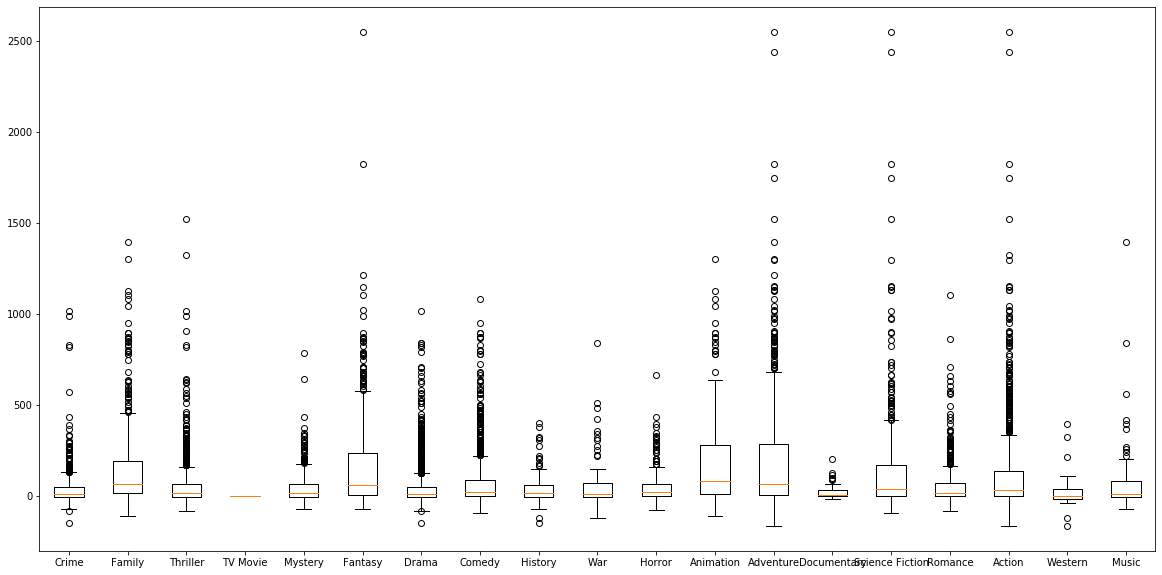

In [343]:
plt.figure(figsize=(20,10))
plt.boxplot(main_list)
plt.xticks(ticks=range(1,20),labels=unique_list2)
plt.show()

In [296]:
genredf.size

105879

In [344]:
main_list[3]

[-0.124875, -2.69042, 1.9]

In [342]:
unique_list2

['Crime',
 'Family',
 'Thriller',
 'TV Movie',
 'Mystery',
 'Fantasy',
 'Drama',
 'Comedy',
 'History',
 'War',
 'Horror',
 'Animation',
 'Adventure',
 'Documentary',
 'Science Fiction',
 'Romance',
 'Action',
 'Western',
 'Music']

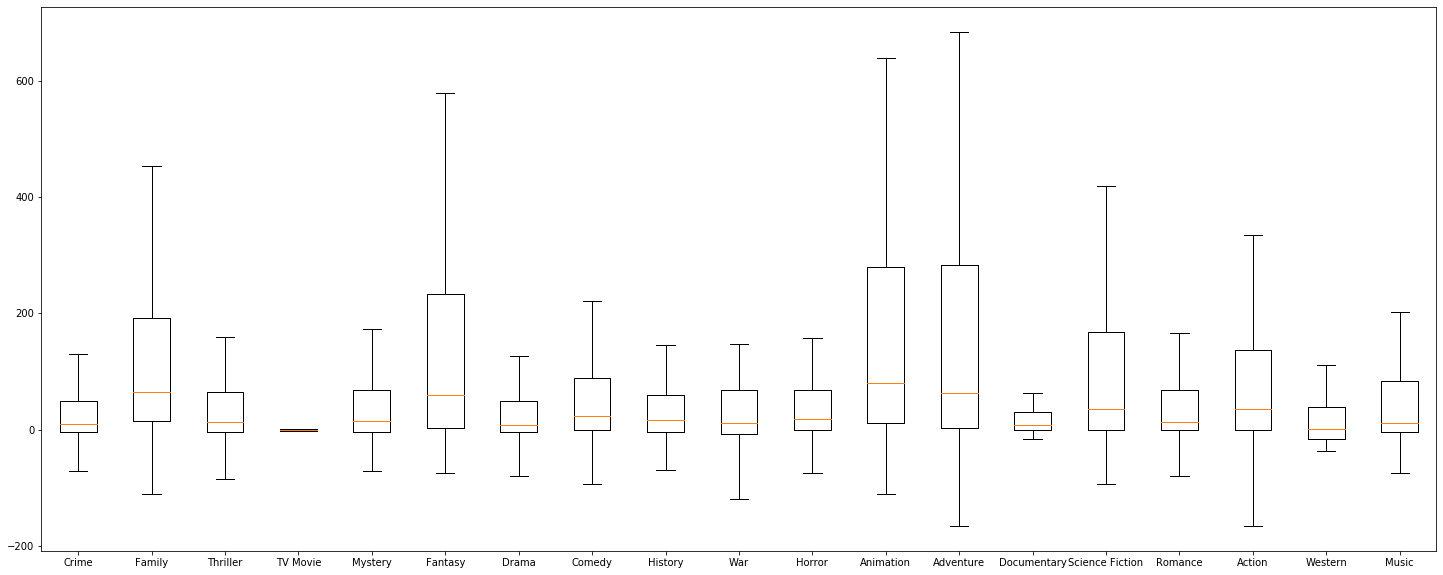

In [349]:
plt.figure(figsize=(25,10))
plt.boxplot(main_list,showfliers=False)
plt.xticks(ticks=range(1,20),labels=unique_list2)
plt.show()

### Runtime Vrs. Profit

In [366]:
new_df['profit']=new_df.revenue-new_df.budget
new_df.drop('index',axis=1,inplace=True)

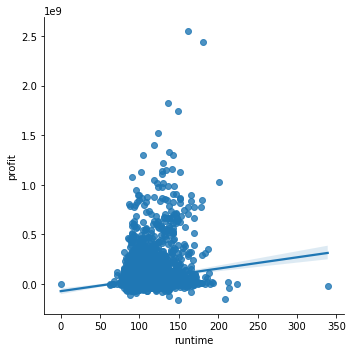

In [369]:

sns.lmplot(x='runtime',y='profit', data=new_df, robust=True)

### Genere by year


In [438]:
df['genre_list']=df.genres.apply(namelist)
df

,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,imdb_id,runtime,production_companies,prodcution_countries,genres,revenue,release_year,release_month,production_list,genre_list
0,86.008,14336,475557,en,"[80, 18, 53]",Joker,8.2,"During the 1980s, a failed stand-up comedian i...",55000000,tt7286456,122.0,"[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...","[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1074251311,2019,10,"[DC Entertainment, Warner Bros. Pictures, DC C...","[Crime, Thriller, Drama]"
1,68.072,155,430155,ru,"[28, 14, 878]",Coma,6.1,A young and talented architect comes to his se...,4000000,tt6087226,111.0,"[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 29924, 'logo_path': None, 'name': 'Fre...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",2363584,2019,11,"[Fresh Film, Cinema Fund, Mars Media Entertain...","[Fantasy, Action, Science Fiction]"
2,84.160,19336,299536,en,"[28, 12, 878]",Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,300000000,tt4154756,149.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2046239637,2018,4,[Marvel Studios],"[Adventure, Action, Science Fiction]"
3,72.376,16642,271110,en,"[28, 12, 878]",Captain America: Civil War,7.4,"Following the events of Age of Ultron, the col...",250000000,tt3498820,147.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1153296293,2016,4,[Marvel Studios],"[Adventure, Action, Science Fiction]"
4,67.660,26841,27205,en,"[28, 12, 878]",Inception,8.3,"Cobb, a skilled thief who commits corporate es...",160000000,tt1375666,148.0,"[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 923, 'logo_path': '/5UQsZrfbfG2dYJbx8D...","[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",825532764,2010,7,"[Legendary Entertainment, Syncopy, Warner Bros...","[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,8.765,128,32250,ja,[27],Ju-on: The Curse,6.8,"Jealous of his wifes' love for another man, a ...",4000000,tt0330500,70.0,"[{'id': 9221, 'logo_path': '/7hEAueutGnsQUyUGn...","[{'id': 9221, 'logo_path': '/7hEAueutGnsQUyUGn...","[{'id': 27, 'name': 'Horror'}]",0,2000,2,"[Toei Video Company, Ltd.]",[Horror]
9974,6.516,190,13637,ja,"[12, 28, 35, 37, 53]",Sukiyaki Western Django,6.3,Several hundred years after the Battle of Dann...,3800000,tt0906665,121.0,"[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 648, 'logo_path': '/nCIeUG7ntLvo8aMXIk...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2725258,2007,9,"[Sony Music Entertainment (JP), DENTSU]","[Adventure, Action, Comedy, Western, Thriller]"
9975,6.813,108,581531,ko,"[27, 53]",Metamorphosis,7.5,An evil spirit that changes faces infiltrates ...,0,tt10800758,113.0,"[{'id': 113584, 'logo_path': '/8BSD4OLpa5DnXdX...","[{'id': 113584, 'logo_path': '/8BSD4OLpa5DnXdX...","[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",0,2019,8,"[Acemaker Movieworks, Danacreative]","[Horror, Thriller]"
9976,5.232,90,482712,fr,[18],The Apparition,6.2,"Jacques Mayano, a French journalist who has li...",9661157,tt6559390,139.0,"[{'id': 77552, 'logo_path': None, 'name': 'Cur...","[{'id': 77552, 'logo_path': None, 'name': 'Cur...","[{'id': 18, 'name': 'Drama'}]",3562793,2018,2,"[Curiosa Films, France 3 Cinéma, Gabriel Inc.,...",[Drama]


In [439]:
for genre in unique_list2:
    new_col=genre
    df[new_col]=df['genre_list'].apply(lambda x: 1 if genre in x else 0 )

In [440]:
year_groupby = df.groupby(['release_year']).sum()

In [441]:
year_groupby.drop(year_groupby.iloc[:,0:9],axis=1,inplace=True)

TypeError: 'str' object is not callable

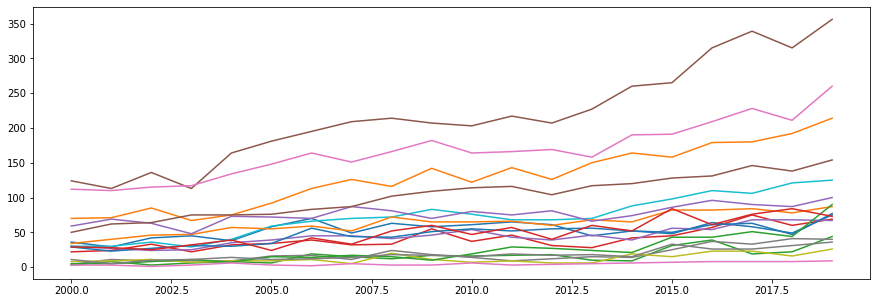

In [464]:
#this works lol 
plt.figure(figsize=(15,5))
plt.plot(year_groupby)
plt.title('Total count of movie genre per year')
plt.legend(list(year_groupby.columns),bbox_to_anchor=(-0.05, 1), loc='upper right', ncol=1)
plt.xticks(range(2000,2020))
plt.xlabel('Year')
plt.ylabel('Count of Movies')




plt.show()

In [456]:
range(len(list(year_groupby.index)))

range(0, 20)

### Genre release by month

In [487]:
month_groupby = df.groupby(['release_month']).mean()
month_groupby

,popularity,vote_count,id,vote_average,budget,runtime,revenue,release_year,Crime,Family,...,War,Horror,Animation,Adventure,Documentary,Science Fiction,Romance,Action,Western,Music
release_month,,,,,,,,,,,,,,,,,,,,,
1,9.995992,586.015769,181811.467806,6.129172,1.036326e+07,97.796053,2.494957e+07,2011.135348,0.144547,0.101183,...,0.019711,0.157687,0.082786,0.107753,0.076216,0.097240,0.126150,0.228647,0.006570,0.028909
2,10.339982,825.610169,183967.264124,6.171186,1.429708e+07,99.157001,3.643184e+07,2011.396893,0.120056,0.124294,...,0.021186,0.131356,0.111582,0.134181,0.029661,0.087571,0.199153,0.218927,0.005650,0.031073
3,10.299233,843.361474,192163.001189,6.191795,1.603012e+07,98.734839,3.981110e+07,2011.369798,0.134364,0.108205,...,0.027348,0.123662,0.095125,0.118906,0.046373,0.105826,0.151011,0.209275,0.005945,0.020214
4,10.152366,780.997365,203946.563900,6.118709,1.424986e+07,99.614776,4.254857e+07,2011.765481,0.125165,0.065876,...,0.032938,0.137022,0.067194,0.111989,0.068511,0.094862,0.154150,0.202899,0.006588,0.038208
5,11.115456,1152.291223,201927.813830,6.254255,2.112155e+07,102.017287,6.378787e+07,2011.632979,0.114362,0.079787,...,0.017287,0.138298,0.063830,0.132979,0.053191,0.109043,0.164894,0.207447,0.013298,0.033245
6,11.112037,1260.030043,206953.160229,6.236767,2.354418e+07,99.592275,7.842909e+07,2011.765379,0.108727,0.128755,...,0.012876,0.124464,0.110157,0.140200,0.071531,0.111588,0.144492,0.211731,0.011445,0.048641
7,11.114873,1132.727811,193982.152367,6.189793,2.121479e+07,99.797337,6.550102e+07,2011.381657,0.096154,0.137574,...,0.020710,0.139053,0.158284,0.183432,0.060651,0.155325,0.127219,0.282544,0.013314,0.028107
8,10.574398,709.339022,218685.608646,6.176451,1.259172e+07,98.781321,2.875037e+07,2011.921502,0.120592,0.098976,...,0.019340,0.195677,0.097838,0.131968,0.028441,0.101251,0.126280,0.234357,0.007964,0.042093
9,10.339145,652.480346,190590.650943,6.295440,9.783634e+06,101.915881,2.083368e+07,2011.277516,0.130503,0.066038,...,0.029088,0.143868,0.062107,0.077830,0.055818,0.076258,0.170597,0.166667,0.011792,0.039308


In [485]:
month_groupby_sum=month_groupby.drop(month_groupby.iloc[:,0:9],axis=1)

In [486]:
month_groupby_sum

,Family,Thriller,TV Movie,Mystery,Fantasy,Drama,Comedy,History,War,Horror,Animation,Adventure,Documentary,Science Fiction,Romance,Action,Western,Music
release_month,,,,,,,,,,,,,,,,,,
1,77,206,38,68,71,297,256,26,15,120,63,82,58,74,96,174,5,22
2,88,173,24,63,74,284,259,25,15,93,79,95,21,62,141,155,4,22
3,91,208,22,72,63,341,304,23,23,104,80,100,39,89,127,176,5,17
4,50,184,29,70,47,315,270,27,25,104,51,85,52,72,117,154,5,29
5,60,188,26,49,60,353,232,28,13,104,48,100,40,82,124,156,10,25
6,90,163,18,56,55,285,258,10,9,87,77,98,50,78,101,148,8,34
7,93,166,21,43,90,240,238,24,14,94,107,124,41,105,86,191,9,19
8,87,263,28,81,69,365,312,24,17,172,86,116,25,89,111,206,7,37
9,84,360,11,113,82,682,369,55,37,183,79,99,71,97,217,212,15,50


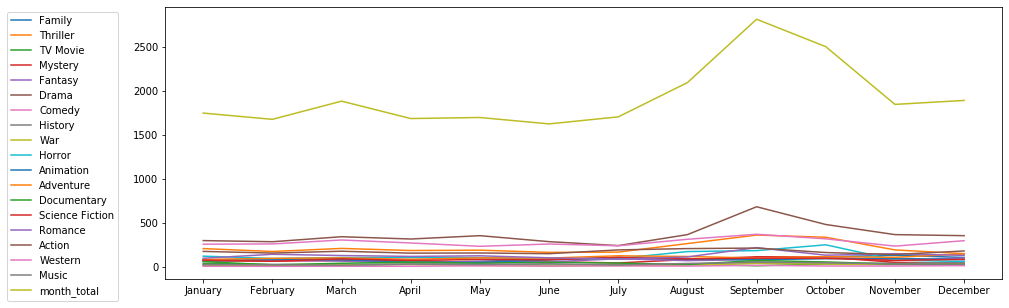

In [508]:
plt.figure(figsize=(15,5))
plt.plot(month_groupby_sum)

plt.legend(list(month_groupby_sum.columns),bbox_to_anchor=(-0.05, 1), loc='upper right', ncol=1)
plt.xticks(range(1,13),labels=['January','February','March','April','May','June','July','August','September','October','November','December'])





plt.show()

In [506]:
#Dump month Graph
sum_list=[]
for i in range(0,12): 
    sum_list.append(month_groupby_sum.iloc[i].sum())
month_groupby_sum['month_total']=sum_list

In [507]:
month_groupby_sum

,Family,Thriller,TV Movie,Mystery,Fantasy,Drama,Comedy,History,War,Horror,Animation,Adventure,Documentary,Science Fiction,Romance,Action,Western,Music,month_total
release_month,,,,,,,,,,,,,,,,,,,
1,77,206,38,68,71,297,256,26,15,120,63,82,58,74,96,174,5,22,1748
2,88,173,24,63,74,284,259,25,15,93,79,95,21,62,141,155,4,22,1677
3,91,208,22,72,63,341,304,23,23,104,80,100,39,89,127,176,5,17,1884
4,50,184,29,70,47,315,270,27,25,104,51,85,52,72,117,154,5,29,1686
5,60,188,26,49,60,353,232,28,13,104,48,100,40,82,124,156,10,25,1698
6,90,163,18,56,55,285,258,10,9,87,77,98,50,78,101,148,8,34,1625
7,93,166,21,43,90,240,238,24,14,94,107,124,41,105,86,191,9,19,1705
8,87,263,28,81,69,365,312,24,17,172,86,116,25,89,111,206,7,37,2095
9,84,360,11,113,82,682,369,55,37,183,79,99,71,97,217,212,15,50,2816


### Buzzword analysis 

In [523]:
year_00=df[df.release_year==2000]
year_00=year_00.drop(year_00.iloc[:,10:],axis=1)
year_00.reset_index(inplace=True)
year_00

,index,popularity,vote_count,id,original_language,genre_ids,title,vote_average,overview,budget,imdb_id
0,119,25.473,12275,98,en,"[28, 12, 18]",Gladiator,8.2,"In the year 180, the death of emperor Marcus A...",103000000,tt0172495
1,149,20.730,4334,4247,en,[35],Scary Movie,6.2,Following on the heels of popular teen-scream ...,19000000,tt0175142
2,260,23.935,9837,77,en,"[9648, 53]",Memento,8.2,Leonard Shelby is tracking down the man who ra...,9000000,tt0209144
3,313,21.216,7689,8358,en,"[12, 18]",Cast Away,7.6,"Chuck Nolan, a top international manager for F...",90000000,tt0162222
4,344,15.522,6410,9741,en,"[18, 9648, 53]",Unbreakable,7.1,An ordinary man makes an extraordinary discove...,75000000,tt0217869
...,...,...,...,...,...,...,...,...,...,...,...
255,9795,6.497,49,37722,en,"[18, 9648, 10749]",Waking the Dead,6.6,A congressional candidate questions his sanity...,8500000,tt0127349
256,9861,9.538,40,101514,en,"[18, 10751, 35, 10770]",Quints,5.7,A teenager goes to desperate lengths to get at...,0,tt0245380
257,9945,6.486,49,27745,en,"[99, 10402]",The Filth and the Fury,7.2,Julien Temple's second documentary profiling p...,0,tt0236216
258,9970,5.045,76,4973,fr,"[18, 9648]",Under the Sand,6.7,"When her husband goes missing at the beach, a ...",0,tt0240913


In [526]:
#year_00.overview[0].split(' ')

In [ ]:
sum_list=[]
for i in range(0,260): 
    sum_list.append(year_00.overview[i].split(' '))
month_groupby_sum['Name']=sum_list

In [527]:
year_00['word_list']=year_00.overview.apply(lambda x: x.split(' '))

In [600]:
year_00_words=year_00.word_list
dup_words=[]
for item in year_00_words:
    for word in item:
        dup_words.append(word.title())
unique_words=list(set(dup_words))
unique_words=[word.title()for word in unique_words]

In [601]:
word_dictionary={}
for word in unique_words:
    if word not in pronouns:
        word_dictionary[word]=0
    
for word in dup_words:
    if word not in pronouns:
        word_dictionary[word]=word_dictionary[word]+1

In [602]:
word_dictionary
final_word=pd.DataFrame(word_dictionary.items(),  columns=['Name', 'Count'])
final_word

,Name,Count
0,,7
1,Break,4
2,"""City",1
3,Fed,1
4,Brutally,1
...,...,...
4882,Longer,2
4883,Stickell,1
4884,"Leader,",1
4885,Immortals,1


In [603]:
final_word=final_word.sort_values('Count',ascending=False)
#final_word.reset_index(inplace=True) #use once
#final_word.drop(['level_0','index'],axis=1,inplace=True)#use once
final_word.head(50)

,Name,Count
492,The,780
1694,A,586
3541,And,415
3078,Of,411
1896,Is,179
713,An,112
2510,When,79
4373,But,68
4086,Are,65
556,Has,60


In [591]:
pronouns='all,another,any,anybody,anyone,anything,as,aught,both,each,each other,either,enough,everybody,everyone,everything,few,he,her,hers,herself,him,himself,his,I,idem,it,its,itself,many,me,mine,most,my,myself,naught,neither,no one,nobody,none,nothing,nought,one,one another,other,others,ought,our,ours,ourself,ourselves,several,she,some,somebody,someone,something,somewhat,such,suchlike,that,thee,their,theirs,theirself,theirselves,them,themself,themselves,there,these,they,thine,this,those,thou,thy,thyself,us,we,what,whatever,whatnot,whatsoever,whence,where,whereby,wherefrom,wherein,whereinto,whereof,whereon,wherever,wheresoever,whereto,whereunto,wherewith,wherewithal,whether,which,whichever,whichsoever,who,whoever,whom,whomever,whomso,whomsoever,whose,whosever,whosesoever,whoso,whosoever,ye,yon,yonder,you,your,yours,yourself,yourselves,About,Above,According to,Across,After,Against,Ahead of,Along,Amidst,Among,Amongst,Apart from,Around,As,As far as,As well as,Aside from,At,Barring,Because of,Before,Behind,Below,Beneath,Beside,Besides,Between,Beyond,By,By means of,Circa,Concerning,Despite,Down,Due to,During,In,In accordance with,In addition to,In case of,In front of,In lieu of,In place of,In spite of,In to,Inside,Instead of,Into,Except,Except for,Excluding,For,Following,From,Like,Minus,Near,Next,Next to,Past,Per,Prior to,Round,Since,Off,On,On account of,On behalf of,On to,On top of,Onto,Opposite,Out,Out from,Out of,Outside,Over,Owing to,Plus,Than,Through,Throughout,Till,Times,To,Toward,Towards,Under,Underneath,Unlike,Until,Unto,Up,Upon,Via,With,With a view to,Within,Without'
pronouns=pronouns.split(',')

In [597]:
pronouns=[word.title() for word in pronouns]

### overview complexity analysis 

In [608]:
def word_average(string):
    split = string.split() 
    word_length=0
    word_count=0
    for word in split:
        word_length+=len(word)
        word_count+=1
    return word_length/word_count

In [626]:
new_df['overview_length']=new_df.overview.apply(word_average)

In [623]:
to_drop=df[df.overview.isna()].index
new_df=df.drop(to_drop)


In [629]:
new_df.groupby('release_year').mean()

,popularity,vote_count,id,vote_average,budget,runtime,revenue,release_month,Crime,Family,...,Horror,Animation,Adventure,Documentary,Science Fiction,Romance,Action,Western,Music,overview_length
release_year,,,,,,,,,,,,,,,,,,,,,
2000,10.457262,785.007692,18584.334615,6.215769,2.314965e+07,103.057692,4.464044e+07,6.638462,0.176923,0.138462,...,0.115385,0.111538,0.130769,0.019231,0.111538,0.226923,0.192308,0.011538,0.042308,4.862549
2001,10.915224,987.772388,13701.533582,6.266045,2.220870e+07,104.406716,5.129802e+07,7.085821,0.175373,0.108209,...,0.111940,0.085821,0.149254,0.018657,0.104478,0.257463,0.231343,0.011194,0.018657,4.882178
2002,10.603530,925.908784,13799.989865,6.195608,2.179814e+07,100.290541,5.384252e+07,6.668919,0.168919,0.141892,...,0.121622,0.091216,0.155405,0.027027,0.084459,0.212838,0.216216,0.003378,0.033784,4.889679
2003,10.918359,984.042254,16729.066901,6.279225,2.275527e+07,104.239437,5.715558e+07,6.693662,0.154930,0.158451,...,0.102113,0.109155,0.165493,0.038732,0.112676,0.169014,0.264085,0.010563,0.038732,4.905347
2004,10.540379,1026.838150,16057.132948,6.284393,2.152070e+07,104.355491,5.200407e+07,6.534682,0.121387,0.109827,...,0.115607,0.086705,0.164740,0.020231,0.112717,0.210983,0.216763,0.017341,0.040462,4.883913
2005,10.334870,827.505435,15439.665761,6.142391,2.047300e+07,102.932065,4.701045e+07,6.945652,0.144022,0.154891,...,0.160326,0.089674,0.149457,0.040761,0.065217,0.195652,0.206522,0.008152,0.029891,4.909077
2006,10.351054,800.018692,16687.876168,6.201168,1.820324e+07,101.427570,4.196450e+07,6.764019,0.121495,0.163551,...,0.154206,0.130841,0.137850,0.032710,0.098131,0.163551,0.193925,0.004673,0.028037,4.927485
2007,10.257026,850.553738,14701.102804,6.248364,1.792159e+07,100.981308,4.515726e+07,6.829439,0.161215,0.114486,...,0.163551,0.102804,0.121495,0.039720,0.077103,0.203271,0.200935,0.011682,0.032710,4.924136
2008,10.356713,889.115974,17558.844639,6.173085,1.888132e+07,100.216630,4.606773e+07,6.601751,0.126915,0.137856,...,0.157549,0.094092,0.157549,0.032823,0.113786,0.177243,0.223195,0.006565,0.039387,4.872474
